In [76]:
import pandas as pd
import numpy as np
import scipy as sp
import string
import random
import re
import collections
import matplotlib.pyplot as plt

import keras
from keras import backend as kb
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.callbacks import History 
history = History()

In [2]:
print('Loading file...')
file = '/Users/anamaria1/Desktop/Conferences/2019/Novartis/cfDNA/Hack9-DataAnalysisFolders/DATA.csv'
samples = pd.read_csv(file,sep='\t')

Loading file...


In [3]:
print('Beginning cleaning up file...')
try: 
    del samples['Unnamed: 0']
    del samples['5']
except:
    print('Handled')

Beginning cleaning up file...


In [4]:
# Remove all entries with chromosome X and Y
samples = samples[samples['1'] != 'chrX']
samples = samples[samples['1'] != 'chrY']

In [5]:
a = samples.groupby(['0','1'])['4'].apply(','.join).reset_index()

In [6]:
def splitter(row):
    p = re.split(',',row)
    results = list(map(float, p))
    return results

In [7]:
print('Write to file...')
aa = a.pivot(index='0', columns='1', values='4')
#aa.to_csv('Data/ChrWPS.csv')
print('Done')

Write to file...
Done


In [8]:
aa.head(2)

1,chr1,chr10,chr11,chr12,chr13,chr14,chr15,chr16,chr17,chr18,...,chr20,chr21,chr22,chr3,chr4,chr5,chr6,chr7,chr8,chr9
0,,,,,,,,,,,,,,,,,,,,,
LIB-ZIIEJE,"-0.735294,-0.735294,-0.735294,-0.735294,-0.735...","-0.828169,-0.835655,-0.846797,-0.850416,-0.842...","-1.844444,-1.900000,-1.902174,-1.872340,-1.836...","-1.420561,-1.410714,-1.392857,-1.353448,-1.336...","-3.133333,-3.032258,-2.906250,-2.906250,-2.735...","-0.588889,-0.600000,-0.611111,-0.596685,-0.607...","-0.835821,-0.835821,-0.798030,-0.786408,-0.739...","-0.548023,-0.562500,-0.573864,-0.517045,-0.531...","-0.766355,-0.803738,-0.800000,-0.763636,-0.756...","-1.296875,-1.320312,-1.312500,-1.273438,-1.203...",...,"-2.142857,-2.142857,-2.380952,-2.428571,-2.476...","-0.790419,-0.796407,-0.791667,-0.786982,-0.763...","-1.794118,-1.794118,-1.794118,-1.794118,-1.742...","-0.842857,-0.779904,-0.770335,-0.780952,-0.772...","-1.354839,-1.305263,-1.315789,-1.347368,-1.343...","-1.266667,-1.250000,-1.267399,-1.261029,-1.238...","-3.590909,-3.727273,-3.818182,-3.818182,-3.818...","-1.692810,-1.718954,-1.664557,-1.650000,-1.600...","-0.625000,-0.669903,-0.669903,-0.669903,-0.747...","-3.285714,-3.285714,-3.428571,-3.428571,-3.000..."
LIB-ZIIEJK,"-0.535354,-0.561224,-0.581633,-0.581633,-0.608...","-1.007299,-0.996390,-0.985765,-0.975177,-0.964...","-1.884892,-1.832168,-1.733333,-1.688742,-1.626...","-1.869919,-1.817460,-1.812500,-1.829457,-1.781...","-2.469697,-2.411765,-2.352113,-2.310811,-2.250...","-0.713836,-0.737342,-0.722397,-0.735016,-0.745...","-0.679487,-0.696774,-0.670968,-0.670968,-0.647...","-0.579439,-0.556250,-0.523364,-0.495356,-0.500...","-0.734824,-0.745223,-0.712934,-0.718750,-0.741...","-1.323194,-1.310606,-1.251852,-1.240876,-1.205...",...,"-1.945946,-1.945946,-1.947368,-1.948718,-1.900...","-1.197740,-1.200000,-1.203297,-1.230769,-1.224...","-2.338462,-2.272727,-2.287879,-2.235294,-2.231...","-0.750000,-0.750000,-0.750000,-0.793103,-0.810...","-1.200000,-1.192926,-1.186709,-1.175000,-1.141...","-1.309890,-1.315904,-1.309013,-1.288136,-1.266...","-3.414634,-3.560976,-3.609756,-3.595238,-3.477...","-1.826772,-1.810811,-1.770677,-1.761029,-1.764...","-0.821429,-0.817746,-0.826506,-0.873479,-0.886...","-2.255814,-2.204545,-2.200000,-2.222222,-2.195..."


In [9]:
labels = pd.read_csv('Data/20190815_WPS_NORM.hackathon_sample_info.csv')
data = aa
data = data.reset_index()

In [10]:
data.head(2)

1,0,chr1,chr10,chr11,chr12,chr13,chr14,chr15,chr16,chr17,...,chr20,chr21,chr22,chr3,chr4,chr5,chr6,chr7,chr8,chr9
0,LIB-ZIIEJE,"-0.735294,-0.735294,-0.735294,-0.735294,-0.735...","-0.828169,-0.835655,-0.846797,-0.850416,-0.842...","-1.844444,-1.900000,-1.902174,-1.872340,-1.836...","-1.420561,-1.410714,-1.392857,-1.353448,-1.336...","-3.133333,-3.032258,-2.906250,-2.906250,-2.735...","-0.588889,-0.600000,-0.611111,-0.596685,-0.607...","-0.835821,-0.835821,-0.798030,-0.786408,-0.739...","-0.548023,-0.562500,-0.573864,-0.517045,-0.531...","-0.766355,-0.803738,-0.800000,-0.763636,-0.756...",...,"-2.142857,-2.142857,-2.380952,-2.428571,-2.476...","-0.790419,-0.796407,-0.791667,-0.786982,-0.763...","-1.794118,-1.794118,-1.794118,-1.794118,-1.742...","-0.842857,-0.779904,-0.770335,-0.780952,-0.772...","-1.354839,-1.305263,-1.315789,-1.347368,-1.343...","-1.266667,-1.250000,-1.267399,-1.261029,-1.238...","-3.590909,-3.727273,-3.818182,-3.818182,-3.818...","-1.692810,-1.718954,-1.664557,-1.650000,-1.600...","-0.625000,-0.669903,-0.669903,-0.669903,-0.747...","-3.285714,-3.285714,-3.428571,-3.428571,-3.000..."
1,LIB-ZIIEJK,"-0.535354,-0.561224,-0.581633,-0.581633,-0.608...","-1.007299,-0.996390,-0.985765,-0.975177,-0.964...","-1.884892,-1.832168,-1.733333,-1.688742,-1.626...","-1.869919,-1.817460,-1.812500,-1.829457,-1.781...","-2.469697,-2.411765,-2.352113,-2.310811,-2.250...","-0.713836,-0.737342,-0.722397,-0.735016,-0.745...","-0.679487,-0.696774,-0.670968,-0.670968,-0.647...","-0.579439,-0.556250,-0.523364,-0.495356,-0.500...","-0.734824,-0.745223,-0.712934,-0.718750,-0.741...",...,"-1.945946,-1.945946,-1.947368,-1.948718,-1.900...","-1.197740,-1.200000,-1.203297,-1.230769,-1.224...","-2.338462,-2.272727,-2.287879,-2.235294,-2.231...","-0.750000,-0.750000,-0.750000,-0.793103,-0.810...","-1.200000,-1.192926,-1.186709,-1.175000,-1.141...","-1.309890,-1.315904,-1.309013,-1.288136,-1.266...","-3.414634,-3.560976,-3.609756,-3.595238,-3.477...","-1.826772,-1.810811,-1.770677,-1.761029,-1.764...","-0.821429,-0.817746,-0.826506,-0.873479,-0.886...","-2.255814,-2.204545,-2.200000,-2.222222,-2.195..."


In [11]:
u = list(labels['library'])
data = data[data['0'].isin(u)]
data = data.reset_index()
labels.rename(columns={'library':'PatientId'}, inplace=True)
data.rename(columns={'0':'PatientId'}, inplace=True)

In [12]:
data.head(2)

1,index,PatientId,chr1,chr10,chr11,chr12,chr13,chr14,chr15,chr16,...,chr20,chr21,chr22,chr3,chr4,chr5,chr6,chr7,chr8,chr9
0,0,LIB-ZIIEJE,"-0.735294,-0.735294,-0.735294,-0.735294,-0.735...","-0.828169,-0.835655,-0.846797,-0.850416,-0.842...","-1.844444,-1.900000,-1.902174,-1.872340,-1.836...","-1.420561,-1.410714,-1.392857,-1.353448,-1.336...","-3.133333,-3.032258,-2.906250,-2.906250,-2.735...","-0.588889,-0.600000,-0.611111,-0.596685,-0.607...","-0.835821,-0.835821,-0.798030,-0.786408,-0.739...","-0.548023,-0.562500,-0.573864,-0.517045,-0.531...",...,"-2.142857,-2.142857,-2.380952,-2.428571,-2.476...","-0.790419,-0.796407,-0.791667,-0.786982,-0.763...","-1.794118,-1.794118,-1.794118,-1.794118,-1.742...","-0.842857,-0.779904,-0.770335,-0.780952,-0.772...","-1.354839,-1.305263,-1.315789,-1.347368,-1.343...","-1.266667,-1.250000,-1.267399,-1.261029,-1.238...","-3.590909,-3.727273,-3.818182,-3.818182,-3.818...","-1.692810,-1.718954,-1.664557,-1.650000,-1.600...","-0.625000,-0.669903,-0.669903,-0.669903,-0.747...","-3.285714,-3.285714,-3.428571,-3.428571,-3.000..."
1,1,LIB-ZIIEJK,"-0.535354,-0.561224,-0.581633,-0.581633,-0.608...","-1.007299,-0.996390,-0.985765,-0.975177,-0.964...","-1.884892,-1.832168,-1.733333,-1.688742,-1.626...","-1.869919,-1.817460,-1.812500,-1.829457,-1.781...","-2.469697,-2.411765,-2.352113,-2.310811,-2.250...","-0.713836,-0.737342,-0.722397,-0.735016,-0.745...","-0.679487,-0.696774,-0.670968,-0.670968,-0.647...","-0.579439,-0.556250,-0.523364,-0.495356,-0.500...",...,"-1.945946,-1.945946,-1.947368,-1.948718,-1.900...","-1.197740,-1.200000,-1.203297,-1.230769,-1.224...","-2.338462,-2.272727,-2.287879,-2.235294,-2.231...","-0.750000,-0.750000,-0.750000,-0.793103,-0.810...","-1.200000,-1.192926,-1.186709,-1.175000,-1.141...","-1.309890,-1.315904,-1.309013,-1.288136,-1.266...","-3.414634,-3.560976,-3.609756,-3.595238,-3.477...","-1.826772,-1.810811,-1.770677,-1.761029,-1.764...","-0.821429,-0.817746,-0.826506,-0.873479,-0.886...","-2.255814,-2.204545,-2.200000,-2.222222,-2.195..."


In [14]:
labels = labels.sort_values(by=['PatientId'])
data = data.sort_values(by=['PatientId'])

In [15]:
names = data.columns
samples_id = list(data['PatientId'])
del data['PatientId']
del data['index']

In [16]:
def frag_profile(x):
    p = x.split(',')
    results = list(map(float, p))
    return results

In [17]:
data.drop(data.tail(1).index,inplace=True) # Last row has nan values 

In [18]:
X = data.values
Y = labels['estimated.purity'].values

In [19]:
from scipy import signal 
import math 
import pywt

In [20]:
def waveletCoeffMatrix(x):
    coeff, _ = pywt.cwt(x, range(1,32), 'morl', 1)
    coeff_ = coeff[:,:31]
    return coeff_

In [21]:
XX = np.ndarray(shape=(100,31,31,22)) # pick 100 samples

In [22]:
for jj in range(0,22):
    #print(jj)
    label = ('chr%s'%(jj+1))
    chr_data = data[label].apply(lambda row : frag_profile(row))
    signal_matrix = np.array(chr_data.values.tolist())
    for ii in range(0,100):
        coeff, _ = pywt.cwt(signal_matrix[ii], range(1,32), 'morl', 1)
        coeff_ = coeff[:,:31]
        XX[ii,:,:,jj] = coeff_

In [23]:
XX.shape

(100, 31, 31, 22)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
indices = [i for i in range(len(XX))]

In [27]:
X_train, X_test ,Y_train, Y_test, indices_train, indices_test = train_test_split(XX, Y[:100], indices, test_size=0.2)

In [28]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(80, 31, 31, 22) (80,)
(20, 31, 31, 22) (20,)


In [29]:
batch_size = 16
num_classes = 1
epochs = 10
IMG_SIZE = 31
input_shape = (IMG_SIZE, IMG_SIZE, 22)

In [30]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, input_dim=1))
model.add(Dense(1))
#model.add(Dense(2, activation='relu'))
#model.add(Dense(num_classes, activation='softmax'))

In [77]:
def keras_custom_loss_function(y_actual, y_predicted):
        custom_loss_value = -y_actual*kb.log(y_predicted) - ((1-y_actual)*(1-y_actual))*kb.log(1-y_predicted)
        return np.mean(custom_loss_value)

In [80]:
model.compile(loss = 'mean_squared_error', optimizer = keras.optimizers.Adadelta(), metrics=['accuracy'])

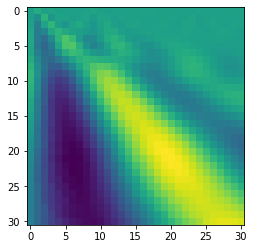

In [81]:
plt.imshow(X_train[1,:,:,2])

In [58]:
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=2, validation_data=(X_test, Y_test))

Train on 80 samples, validate on 20 samples
Epoch 1/10
 - 0s - loss: 0.0397 - accuracy: 0.4125 - val_loss: 0.0441 - val_accuracy: 0.4500
Epoch 2/10
 - 0s - loss: 0.1129 - accuracy: 0.2875 - val_loss: 0.0152 - val_accuracy: 0.4500
Epoch 3/10
 - 0s - loss: 0.0182 - accuracy: 0.4125 - val_loss: 0.0015 - val_accuracy: 0.4500
Epoch 4/10
 - 0s - loss: 0.0103 - accuracy: 0.4125 - val_loss: 0.0019 - val_accuracy: 0.4500
Epoch 5/10
 - 0s - loss: 0.0071 - accuracy: 0.4125 - val_loss: 0.0059 - val_accuracy: 0.4500
Epoch 6/10
 - 0s - loss: 0.0066 - accuracy: 0.4125 - val_loss: 0.0013 - val_accuracy: 0.4500
Epoch 7/10
 - 0s - loss: 0.0070 - accuracy: 0.4125 - val_loss: 0.0017 - val_accuracy: 0.4500
Epoch 8/10
 - 0s - loss: 0.0057 - accuracy: 0.4125 - val_loss: 0.0014 - val_accuracy: 0.4500
Epoch 9/10
 - 0s - loss: 0.0053 - accuracy: 0.4125 - val_loss: 0.0117 - val_accuracy: 0.4500
Epoch 10/10
 - 0s - loss: 0.0079 - accuracy: 0.4125 - val_loss: 0.0042 - val_accuracy: 0.4500


In [82]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.008460532873868942
Test accuracy: 0.44999998807907104


In [83]:
Y_predicted = model.predict(X_test)
j = 4
print('True value %s, predicted value %s' % (Y_test[j],Y_predicted[j]))

True value 0.11, predicted value [0.15443876]
